## Esercitazione 6 - 25 Marzo 2024

Scrivere le funzioni python `bisezione.py`, `falsi.py`,  che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il testi di arresto per l'errore relativo tra due iterati successivi
-  tolf: tolleranza per il test di arresto sul valore della funzione
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk



In [10]:
import math 
def sign(x):
  """
  Funzione segno che restituisce 1 se x è positivo, 0 se x è zero e -1 se x è negativo.
  """
  return math.copysign(1, x)

In [11]:
def metodo_bisezione(fname, a, b, tolx):
 
 fa=fname(a)
 fb=fname(b)
 if sign(fa)*sign(fb)>=0:
     print("Non è possibile applicare il metodo di bisezione \n")
     return None, None,None

 it = 0
 v_xk = []

 while abs(b-a)>tolx:
    xk = a+(b-a)/2
    v_xk.append(xk)
    it += 1
    fxk=fname(xk)
    if fxk==0:
      return xk, it, v_xk

    if sign(fxk)*sign(fb)<0:
      a = xk 
      fa= fxk
    elif sign(fxk)*sign(fa)<0:
      b = xk
      fb= fxk

 
 return xk, it, v_xk

In [5]:
def falsa_posizione(fname,a,b,tolx,tolf,maxit):
    fa=fname(a)
    fb=fname(b)
    if sign(fa)*sign(fb)>=0:
       print("Metodo di bisezione non applicabile")
       return None,None,None

    it=0
    v_xk=[]
    fxk=1+tolf
    errore=1+tolx
    xprec=a
    while it<maxit and abs(fxk)>tolf and errore>tolx :
        xk= a-fa*((b-a)/(fb-fa))
        v_xk.append(xk)
        it+=1
        fxk=fname(xk)
        if fxk==0:
            return xk,it,v_xk

        if sign(fxk)*sign(fa)<0:
           b= xk
           fb= fxk
        elif sign(fxk)*sign(fb)<0:
           a=xk
           fa=fxk
        if xk!=0:
            errore= abs(xk-xprec)/abs(xk)
        else:
            errore=abs(xk-xprec)
        xprec=xk
    
    return xk,it,v_xk

In [6]:
def corde(fname,coeff_ang,x0,tolx,tolf,nmax):
    
     # coeff_ang è il coefficiente angolare della retta che rimane fisso per tutte le iterazioni
        xk=[]
        
        it=0
        errorex=1+tolx
        erroref=1+tolf
        while it<nmax and errorex >tolx and erroref>tolf:
           
           fx0=fname(x0)
           d=coeff_ang
          
           x1=x0-fx0/d
           fx1=fname(x1)
           if x1!=0:
                errorex=abs(x1-x0)/abs(x1)
           else:
                errorex=abs(x1-x0)
           
           erroref=abs(fx1)
           
           x0=x1
           it=it+1
           xk.append(x1)
          
        if it==nmax:
            print('Corde : raggiunto massimo numero di iterazioni \n')
            
        
        return x1,it,xk

In [7]:
def secanti(fname,xm1,x0,tolx,tolf,nmax):
        xk=[]
        
        it=0
        errorex=1+tolx
        erroref=1+tolf
        while errorex>tolx and erroref > tolf and it < nmax:
            
            fxm1=fname(xm1)
            fx0=fname(x0)
            d=(fx0-fxm1)/(x0-xm1)

            x1=x0-fx0/d 
          
            
            fx1=fname(x1)
            xk.append(x1);
            if x1!=0:
                errorex=abs(x1-x0)/abs(x1) 
            else:
                errorex=abs(x1-x0)
                
            erroref=abs(fx1) 
            xm1=abs(x0)
            x0=abs(x1)
            
            it=it+1;
           
       
        if it==nmax:
           print('Secanti: raggiunto massimo numero di iterazioni \n')
        
        return x1,it,xk
 

In [8]:
def newton(fname,fpname,x0,tolx,tolf,nmax):
  
        xk=[]
       
        it=0
        errorex=1+tolx
        erroref=1+tolf
        while errorex>tolx and erroref > tolf and it<nmax:
           
           fx0=fname(x0)
           if fpname(x0)==0:
                print(" derivata prima nulla in x0")
                return None, None,None
           d=fx0-fpname(x0)

           x1=x0-d

           fx1=fname(x1)
           erroref=np.abs(fx1)
           if x1!=0:
                errorex=abs(x1-x0)/abs(x1)
           else:
                errorex=abs(x1-x0)

           it=it+1
           x0=x1
           xk.append(x1)
          
        if it==nmax:
            print('Newton: raggiunto massimo numero di iterazioni \n')
            
        
        return x1,it,xk


**Sperimentazione numerica**

## Esercizio 1 

 Confrontare i metodi sopra implementati nei casi seguenti:
- f(x) = $x^3-6x^2-4x+24$ in [-3,8], tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=-2,2,6);
- f(x) = exp(−x) − (x + 1) in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3]  tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei casi 2-4.


Scegli funzione di cui calcolare lo zero 1


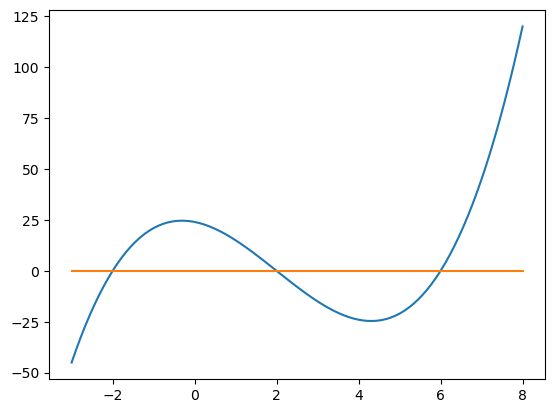

NameError: name 'falsi' is not defined

In [24]:
# Esempio di utilizzo
import numpy as np
import matplotlib.pyplot as plt
 
 
scelta=int(input("Scegli funzione di cui calcolare lo zero"))

match scelta:
    
    case 1:
        f= lambda x:x**3-6*x**2-4*x+24
        #Intervallo di definizione
        a = -3
        b = 8
        alfa=-2  #Uno dei valori in cui si annulla la funzioe
        #Intervallo in cui è contenuta la prima soluzione
        a1=-3.0
        b1=0.0
    case 2:
        f= lambda x: np.exp(-x)-(x+1)
        alfa=0
        a1 = -1
        b1 = 2
        a=a1
        b=b1
    case 3:
        f=  lambda x: np.log2(x+3)-2 #log_b(a)=log(a)/log(b)
        alfa= 1
        a1 = -1
        b1 = 2
        a=a1
        b=b1

    case 4:
        f= lambda x: np.sqrt(x)-(x**2)/4 
        alfa=2.0**(4/3.0)
        a1 = 1
        b1 = 3
        a=a1
        b=b1

xx=np.linspace(a,b,100)
plt.plot(xx,f(xx),xx,np.zeros_like(xx))
 
plt.show()
tolx = 1e-12
tolf=1e-12
maxit=1000
zero,it,xk = metodo_bisezione(f, a1, b1, tolx)
 
zero_f,it_f,xk_f = falsi(f, a1, b1, maxit, tolx,tolf)
 
 
xk=np.array(xk)

if (zero!=None):
    print("Lo zero approssimato da bisezione è: ",zero, "Valore di f in ",zero, "--->", f(zero), "Numero di iterazioni ",it)
    ek=np.abs(xk-alfa)
    plt.semilogy(range(it),ek,'-s')

xk_f=np.array(xk_f)
if (zero_f!=None):
    print("Lo zero approssimato da falsa posizione è: ",zero_f, "Valore di f in ",zero_f, "--->", f(zero_f),"Numero di iterazioni ",it_f)
    ek_f=np.abs(xk_f-alfa)
    plt.semilogy(range(it_f),ek_f,'-s')

plt.legend(['Bisezione','Falsa Posizione'])

In [ ]:
fname= lambda x: x**3-6*x**2-4*x+24
a =-3
b=8
tolx=1e-12
tolf=1e-12
maxit= 100
coeff_ang = (fname(b) - fname(a)) / (b - a)
x0=a
xk, it, v_xk = metodo_bisezione(fname, a, b, tolx)
print("metodo di bisezione xk: ", xk)
xk_f, it_f, v_xk_f = falsa_posizione(fname,a,b,tolx,tolf,maxit)
print("metodo regula falsi xk: ", xk_f)
xk_c, it_c, v_xk_c = corde(fname,coeff_ang,x0,tolx,tolf,maxit)
print("metodo delle corde xk: ", xk_c)

## Esercizio 2

- Utilizzare il metodo di bisezione per calcolare la radice quadrata di 2. Analizzate i risultati.

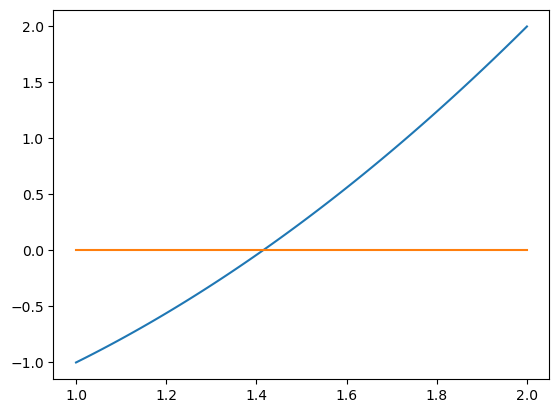

zero = 1.4142135623724243  numero di iterazioni  40


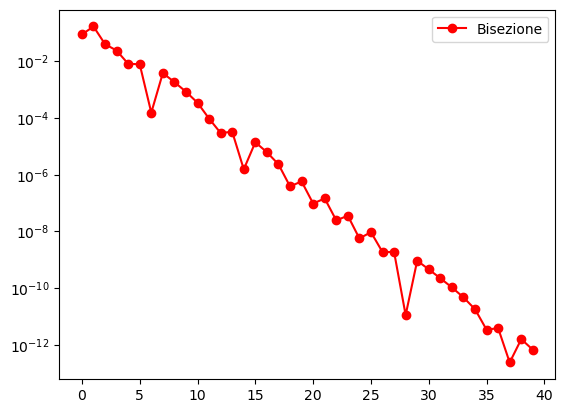

In [16]:
import matplotlib.pyplot as plt
import numpy as np
f4=lambda x: x**2-2

a=1.0
b=2.0
xx=np.linspace(a,b,100)
plt.plot(xx,f4(xx),xx,np.zeros_like(xx))
plt.show()
tolx=1e-12
tolf=1e-12
maxit= 1000

zero_b_4,it_b_4,xk_b_4 = metodo_bisezione(f4, a, b, tolx)

alfa=np.sqrt(2)
err_rel_bis_4=np.abs(np.array(xk_b_4)-alfa)
print("zero =",zero_b_4," numero di iterazioni ",it_b_4)
plt.semilogy(range(it_b_4),err_rel_bis_4,'r-o')
plt.legend(['Bisezione'])

## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [19]:
def norma_infinito(A):
    c=np.sum(np.abs(A), axis=0)
    return np.max(c)

def norma1(A):
    return np.max(np.sum(np.abs(A),axis=1))

A=np.array([[2.0],[3],[4],[5]])
print("Norma infinto: ", norma_infinito(A))
print("Norma infinito con np.linalg.norm: ", np.linalg.norm(A, np.inf))
print("Norma1: ", norma1(A))
print("Norma 1 con np.linalg.norm: ", np.linalg.norm(A, 1))

Norma infinto:  14.0
Norma infinito con np.linalg.norm:  5.0
Norma1:  5.0
Norma 1 con np.linalg.norm:  14.0


## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

In [23]:
A = np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])
def norma2(A):
    return np.sqrt(np.max(np.abs(np.linalg.eigvals(A.T@A))))
print("Norma 2: ", norma2(A))
print("Norma 2 con np: ", np.linalg.norm(A,2))

Norma 2:  9.056251013341882
Norma 2 con np:  9.056251013341878
